In [1]:
# @title #Library Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [2]:
# @title Import Data From DataSource

# URL
dataset_url = "https://community.tableau.com/sfc/servlet.shepherd/document/download/0694T000001GnpUQAS?operationContext=S1"

# Send a GET request to download the file
response = requests.get(dataset_url, allow_redirects=True)

# Save in Colab
file_path = "sample-superstore-sales.xls"
with open(file_path, "wb") as file:
    file.write(response.content)

In [3]:
df = pd.read_excel('/content/sample-superstore-sales.xls')

# Descriptive Statical Analysis
---

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [6]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,49,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,2001,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


# Data Analysis
---

Total Sales Revenue: $2297200.86

Order Date
2014    484247.4981
2015    470532.5090
2016    609205.5980
2017    733215.2552
Name: Sales, dtype: float64


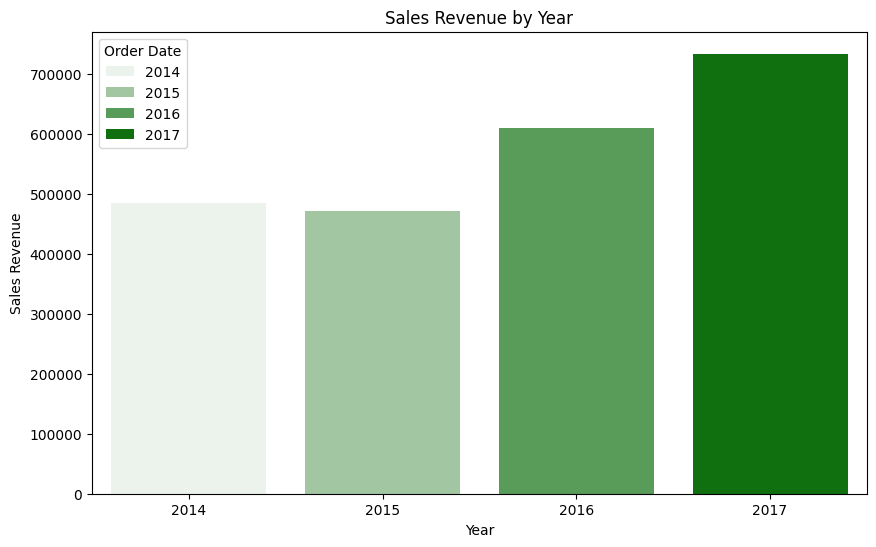

In [8]:
# @title 1. What is the total sales revenue?

# total sales revenue from 2014 to 2017
total_sales_revenue = df['Sales'].sum()
print(f"Total Sales Revenue: ${total_sales_revenue:.2f}\n")

# sales revenue- year wise
sales_revenue_by_year = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
print(sales_revenue_by_year)

# visualization
# fig = px.bar(x=sales_revenue_by_year.index, y=sales_revenue_by_year.values, labels={'x': 'Year', 'y': 'Sales Revenue'})
# fig.update_layout(title='Sales Revenue by Year')
# fig.show()

plt.figure(figsize=(10,6))
sns.barplot(
    data=pd.DataFrame(sales_revenue_by_year),
    x=sales_revenue_by_year.index,
    y=sales_revenue_by_year.values,
    palette='light:g',
    hue=sales_revenue_by_year.index
)
plt.title('Sales Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Sales Revenue')
plt.show()

## Insight
---

*   The dataset from 2014 to 2017 shows that the total sales revenue amounts to **$2,297,200.86**.

*   This value reflects the cumulative gross revenue across all regions, product categories, and sales from *United States*

*   The sales revenue per year shows that the **least sales are from year 2015** while **2017 has the most sales**:
```
2014:  $484,247.49
2015:  $470,532.50
2016:  $609,205.59
2017:  $733,215.25
```

* We notice most sales in year 2017 with **$733,215.25** in sales, indicating a growth trend over the years.

* The least sales were noted in year 2015 with with **$470,532.50** in sales, suggesting a potential dip in business activity or market demand during that year.

## Conclusion
---

* The **Increase** in sales over the years, culminating in 2017, may indicate a successful business strategy, market expansion, or product-specific factors contributing to higher revenue.

## Recommendation
---

1. **Investigate 2015 Decline**:

  -  Perform a deeper analysis to identify contributing factors (e.g., regions, product categories, or external economic influences).

2. **Leverage Insights from 2017**:

  - Identify the drivers of high sales in 2017 (e.g., successful campaigns, high-performing products) and replicate those strategies.

3. **Seasonality Analysis**:

  - Explore monthly or quarterly sales patterns to determine if there are seasonal trends impacting yearly totals.

4. **Regional and Category Breakdown**:

 - Evaluate the contribution of different regions and product categories to yearly sales to identify consistent high performers.


The average overall profit margin per order is: 12.03%
The average profit margin per order in 2014 is: 10.23%
The average profit margin per order in 2015 is: 13.10%
The average profit margin per order in 2016 is: 13.43%
The average profit margin per order in 2017 is: 12.74%



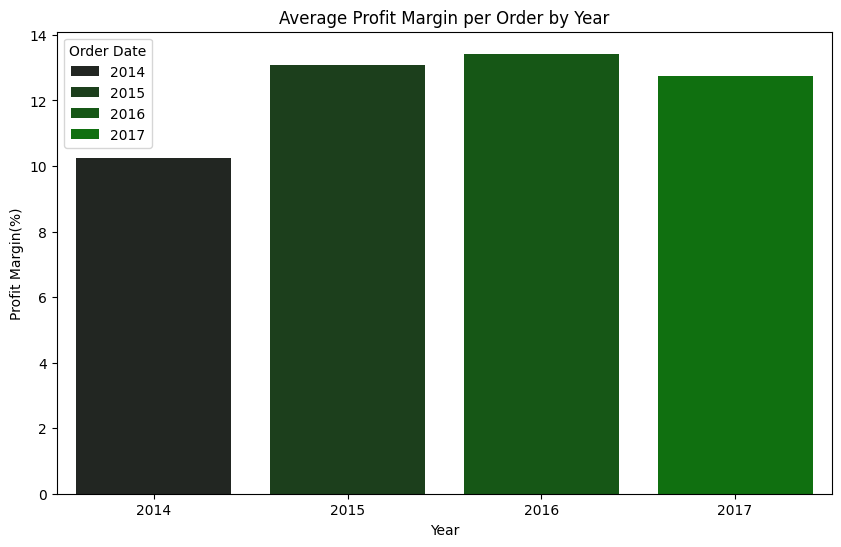

In [9]:
# @title 2. What is the average profit margin per order?

# profit margin from 2014 to 2017
profit_margin = pd.DataFrame(
    data=df['Profit'] / df['Sales'],
    columns=['Profit Margin']).mean().iloc[0]
# print(f"The average overall profit margin per order is: {profit_margin:.4f *}")
print(f"The average overall profit margin per order is: {(profit_margin*100):.2f}%")

# profit margin per year
profit_revenue_per_year = df.groupby(df['Order Date'].dt.year)['Profit'].sum()

profit_margin_per_year = pd.DataFrame(
    data=profit_revenue_per_year / sales_revenue_by_year,
    columns=['Profit Margin'])

for i in range(len(profit_margin_per_year)):
  print(f"The average profit margin per order in {profit_margin_per_year.index[i]} is: {profit_margin_per_year.iloc[i, 0]*100:.2f}%")
print("")

# visualization
profit_margin_per_year['Profit'] = profit_revenue_per_year
profit_margin_per_year['Sales'] = sales_revenue_by_year
profit_margin_per_year.reset_index(inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(
    data=profit_margin_per_year,
    x='Order Date',
    y=profit_margin_per_year['Profit Margin'] * 100,
    palette='dark:g',
    hue='Order Date'
)
plt.title('Average Profit Margin per Order by Year')
plt.xlabel('Year')
plt.ylabel('Profit Margin(%)')
plt.show()

## Insight
---
- The dataset reveals the average overall profit margin per order to be **12.03%**, reflecting the profitability of individual transactions across all regions, product categories, and time periods.

- Breaking it down by year, we observe variations in profit margins:
```
2014:  10.23%
2015:  13.10%
2016:  13.43%
2017:  12.74%
```

- The highest average profit margin was recorded in 2016 (13.43%), while the lowest was in 2014 (10.23%).

- A steady increase in profit margin from 2014 to 2016 indicates improving profitability strategies.
- However, a slight decline in 2017 suggests potential challenges or cost increases impacting profitability.

## Conclusion
---
- The gradual improvement from 2014 to 2016 may indicate *enhanced cost management*, *product pricing strategies*, or a *shift toward more profitable product categories*.

- The dip in 2017, despite being a high-sales year, could suggest:

  - Increased costs (e.g., shipping, production, or marketing expenses).
  - A focus on high-volume, low-margin products or regions.

Category
Technology         145454.9481
Office Supplies    122490.8008
Furniture           18451.2728
Name: Profit, dtype: float64

The product category with the highest total profit is: Technology


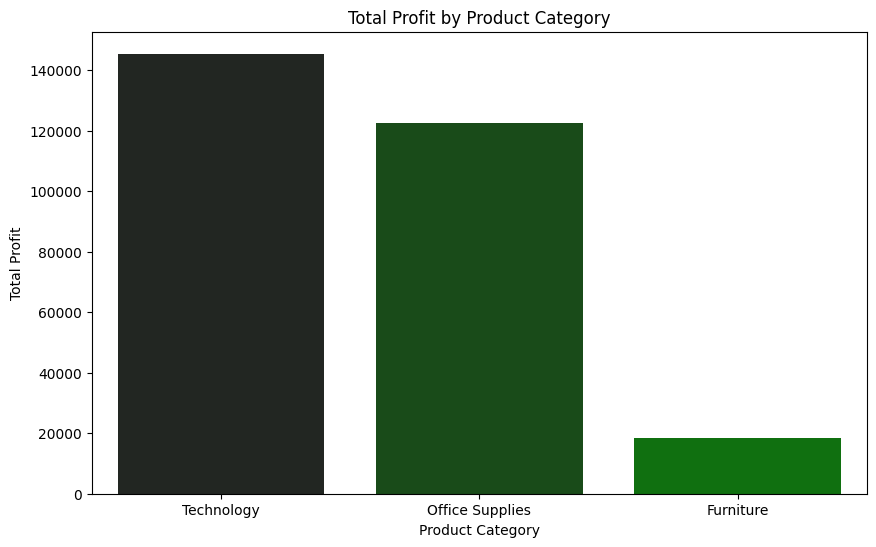

In [10]:
# @title 3. Which product category generates the highest total profit?

# group sumation by product category
product_based_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
print(product_based_profit)
print("")
print(f"The product category with the highest total profit is: {product_based_profit.index[0]}")

# vizualtion
plt.figure(figsize=(10,6))
sns.barplot(
    # index is category names
    x=product_based_profit.index,
    # values is total profit for each category
    y=product_based_profit.values,
    palette='dark:g',
    hue=product_based_profit.index
)
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

## Insight
---
* **Technology:** Generates the highest total profit at $145,454.95, representing a considerable lead over other categories.

* **Office Supplies:** Shows a substantial profit of $122,490.80, indicating a strong performance but lagging behind the Technology sector.

* **Furniture:** Reports the lowest total profit at $18,451.27, suggesting potential challenges in this category.

- The dataset reveals the total profit generated by each product category as follows:
```
Technology         $145,454.95
Office Supplies    $122,490.80
Furniture           $18,451.27
```

- The product category with the highest total profit is Technology, generating $145,454.95, which is 18.8% higher than the profit from Office Supplies, the second most profitable category.

- The Furniture category has significantly lower profitability compared to the other two categories, contributing only $18,451.27 to total profit.

## Conclusion
---
- The dominance of the Technology category in terms of profitability can be attributed to higher margins on electronic products, premium pricing, or better alignment with today's customer demand.

- The Office Supplies category, despite contributing significantly to total sales, may have lower margins or higher cost structures compared to Technology.

- The Furniture category's low profit could result from:
  - Higher production and shipping costs.
  - Lower sales volume compared to the other categories.
  - Potentially lower demand for furniture items in the dataset's timeframe.

## Recommendations
---
1. Focus on Technology:
  - Continue prioritizing and expanding the product range within the Technology category to sustain its profitability.

2. Improve Furniture Profitability:
  - Evaluate cost structures for furniture and explore strategies to reduce expenses (e.g., shipping costs or sourcing materials more efficiently).
  - Assess demand and consider repositioning furniture products to attract more buyers.

3. Enhance Office Supplies Margins:
  - Identify low-margin products within Office Supplies and explore pricing adjustments or alternative suppliers.

4. Customer Segmentation:
  - Segment customers by purchase behavior and preferences across different product categories to tailor marketing strategies and product offerings more effectively.

In [11]:
# @title 4. What is the average shipping time for orders in the Central region?

shipping_time = df.copy(deep=True)
shipping_time['shipping_time'] = (df['Ship Date'] - df['Order Date']).dt.days
c_region = shipping_time[shipping_time['Region'] == 'Central']['shipping_time']
c_region_mean = c_region.mean()
print(f"The average shipping time for orders in the Central region is: {c_region_mean:.2f} days")

The average shipping time for orders in the Central region is: 4.06 days


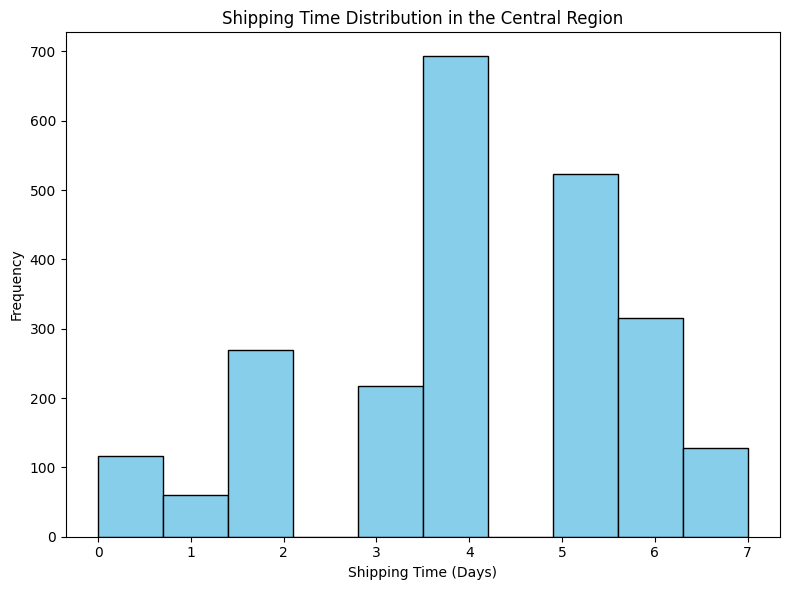

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(c_region, bins=10, color='skyblue', edgecolor='black')
plt.title('Shipping Time Distribution in the Central Region')
plt.xlabel('Shipping Time (Days)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Insight
---
- The dataset reveals that the average shipping time for orders in the Central region is 4.06 days.

## Explanation
---
- The average shipping time reflects the typical duration from order placement to delivery for customers in the Central region.

- Factors influencing shipping time may include:
  - Warehouse proximity to the delivery address.
  - Efficiency of logistics and shipping carriers.
  - Product availability and processing time before dispatch.

## Recommendations
---
1. Improve Shipping Efficiency:
  - Investigate orders with shipping times significantly longer than the average to identify bottlenecks in the logistics process.

2. Set Delivery Expectations:
  - Clearly communicate expected delivery times to customers in the Central region, emphasizing the average shipping time of 4 days.

3. Analyze Other Regions:
  - Compare shipping times across regions to identify and replicate best practices from faster-performing areas.

4. Seasonal Adjustments:
  - Consider seasonal trends that may impact shipping times and plan for increased capacity during peak demand periods.

In [13]:
# @title 5. Which customer segment has the highest average order value?

# finding which segment is highest for sales alone
avg_count = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
print(f"The customer segment with the highest average order value is: {avg_count.index[0]}\n")

# finding which segment is highest- region wise
avg_count_region = df.groupby(['Segment', 'Region'])['Sales'].sum()
avg_count_region = avg_count_region.unstack()
print(f"The customer segment with the highest average order value in each region is:")
print(avg_count_region)
print("")
print(f"The customer segment with the highest average order value in each region is:")
print(avg_count_region.idxmax())
print("")

The customer segment with the highest average order value is: Consumer

The customer segment with the highest average order value in each region is:
Region           Central        East        South         West
Segment                                                       
Consumer     252031.4340  350908.167  195580.9710  362880.7730
Corporate    157995.8128  200409.347  121885.9325  225855.2745
Home Office   91212.6440  127463.726   74255.0015  136721.7770

The customer segment with the highest average order value in each region is:
Region
Central    Consumer
East       Consumer
South      Consumer
West       Consumer
dtype: object



In [14]:
# finding which segment is highest- state wise
avg_count_state = df.groupby(['Segment', 'State'])['Sales'].sum()
avg_count_state = avg_count_state.unstack()
print(f"The customer segment with the highest average order value in each state is:")
print(avg_count_state)
print("")

The customer segment with the highest average order value in each state is:
State         Alabama    Arizona  Arkansas   California   Colorado  Connecticut   Delaware  \
Segment                                                                                      
Consumer      7537.54  16424.422   8802.01  229636.0800  15794.492     5933.477  16961.763   
Corporate    10969.38  11736.322   2463.78  147174.7265   9945.912     5715.690   8311.656   
Home Office   1003.72   7121.257    412.34   80876.8250   6367.714     1735.190   2177.650   

State        District of Columbia     Florida   Georgia     Idaho   Illinois   Indiana     Iowa  \
Segment                                                                                           
Consumer                  2753.34  32701.1960  24447.12  1444.496  45182.195  14986.96  2100.07   
Corporate                     NaN  22477.5915  15982.25  2630.250  15984.280  31788.74   911.45   
Home Office                111.68  34294.9205   8666.47  

In [15]:
# state wise customer segment with the highest average order value

print(f"The customer segment with the highest average order value in each state is:")
print(avg_count_state.idxmax())
print("")

The customer segment with the highest average order value in each state is:
State
Alabama                   Corporate
Arizona                    Consumer
Arkansas                   Consumer
California                 Consumer
Colorado                   Consumer
Connecticut                Consumer
Delaware                   Consumer
District of Columbia       Consumer
Florida                 Home Office
Georgia                    Consumer
Idaho                     Corporate
Illinois                   Consumer
Indiana                   Corporate
Iowa                       Consumer
Kansas                  Home Office
Kentucky                   Consumer
Louisiana                  Consumer
Maine                     Corporate
Maryland                  Corporate
Massachusetts              Consumer
Michigan                   Consumer
Minnesota                  Consumer
Mississippi                Consumer
Missouri                  Corporate
Montana                 Home Office
Nebraska          

In [16]:
# finding which segment is highest- product and profit wise
avg_count_product_sales = df.groupby(['Segment', 'Category'])['Sales'].sum()
avg_count_product_sales = avg_count_product_sales.unstack()
print(f"The customer segment with the highest average order value in each product category is:")
print(avg_count_product_sales)
print("")
print(f"The customer segment with the highest average order value in each product category is:")
print(avg_count_product_sales.idxmax())
print("")

avg_count_product_profit = df.groupby(['Segment', 'Category'])['Profit'].sum()
avg_count_product_profit = avg_count_product_profit.unstack()
print(f"The customer segment with the highest average order value in each product category is:")
print(avg_count_product_profit)
print("")
print(f"The customer segment with the highest average order value in each product category is:")
print(avg_count_product_profit.idxmax())
print("")

The customer segment with the highest average order value in each product category is:
Category       Furniture  Office Supplies  Technology
Segment                                              
Consumer     391049.3120       363952.136  406399.897
Corporate    229019.7858       230676.462  246450.119
Home Office  121930.6975       124418.434  183304.017

The customer segment with the highest average order value in each product category is:
Category
Furniture          Consumer
Office Supplies    Consumer
Technology         Consumer
dtype: object

The customer segment with the highest average order value in each product category is:
Category     Furniture  Office Supplies  Technology
Segment                                            
Consumer     6991.0786       56330.3210  70797.8096
Corporate    7584.8158       40227.3202  44166.9980
Home Office  3875.3784       25933.1596  30490.1405

The customer segment with the highest average order value in each product category is:
Category
Fur

<ipython-input-17-3fc64558b929>:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45)
<ipython-input-17-3fc64558b929>:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,1].legend(title="Customer Segment")


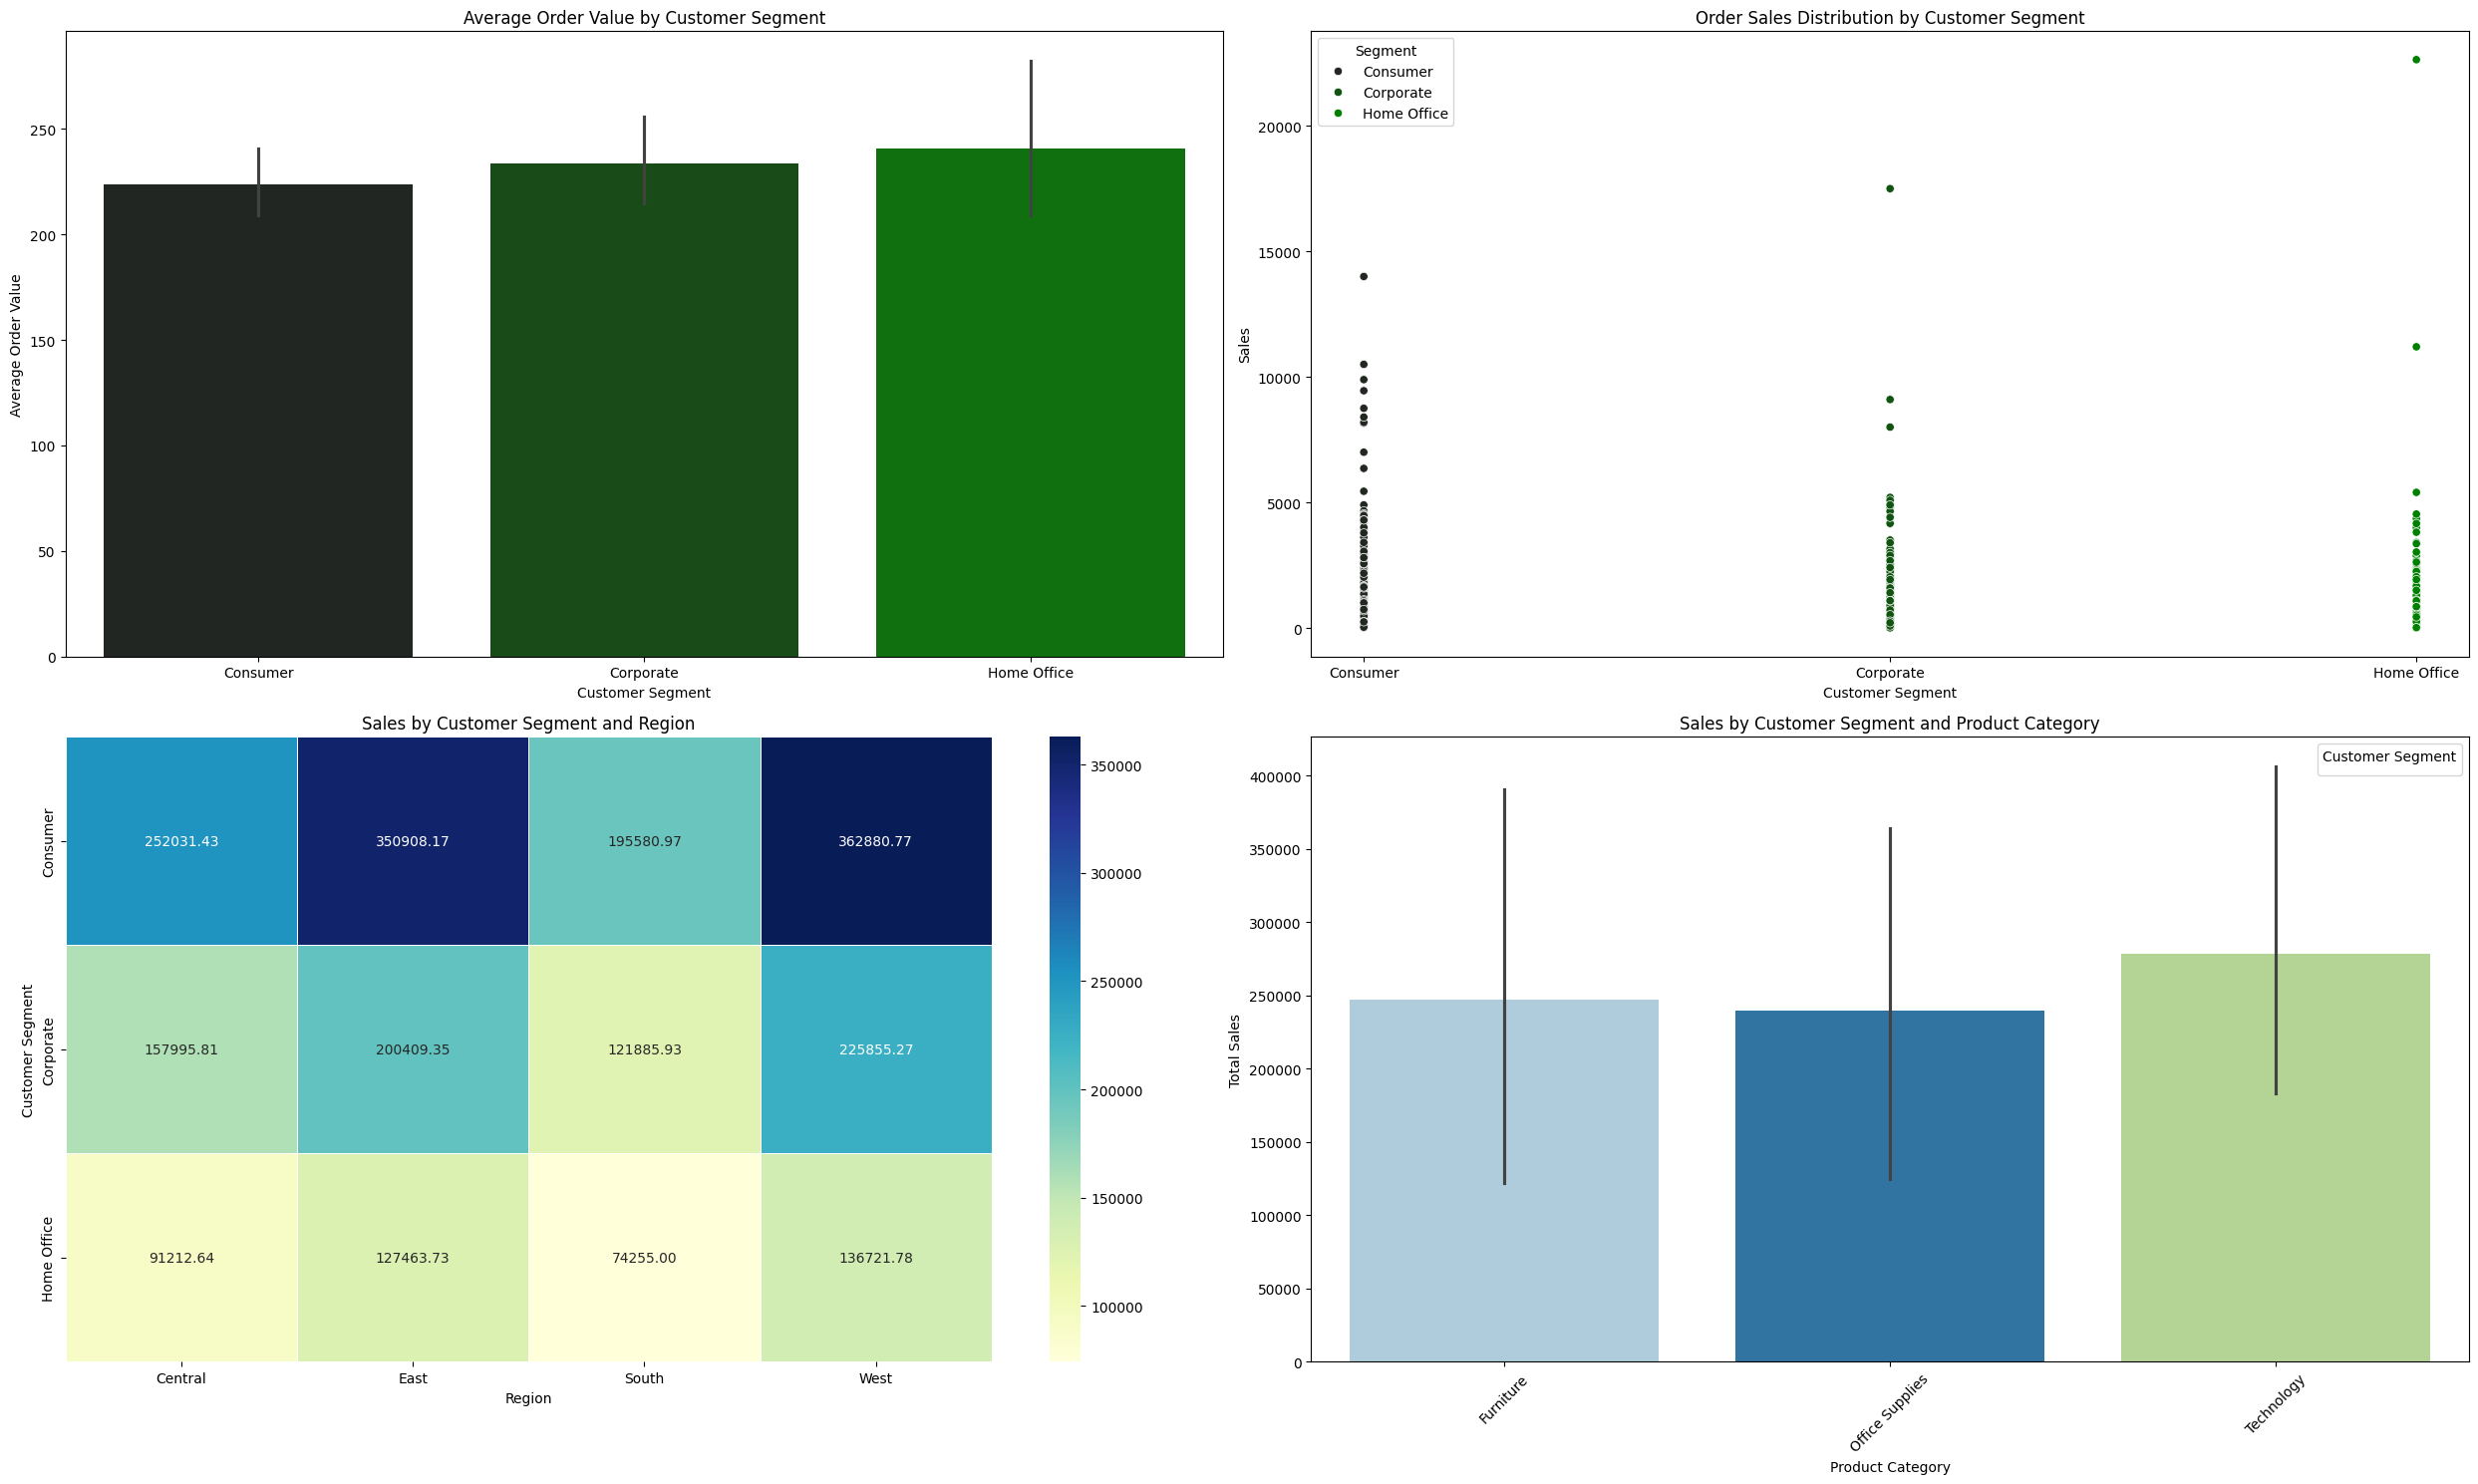

In [17]:
# visualization
# show catplot and scatterplot side by side

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(25, 15))

# Bar plot for average sales by customer segment
sns.barplot(
    data=df,
    x='Segment',
    y='Sales',
    ax=axs[0,0],
    palette='dark:g',
    hue='Segment'
)
axs[0,0].set_title('Average Order Value by Customer Segment')
axs[0,0].set_xlabel('Customer Segment')
axs[0,0].set_ylabel('Average Order Value')

# Scatter plot for sales by customer segment
sns.scatterplot(
    data=df,
    x='Segment',
    y='Sales',
    hue='Segment',
    palette='dark:g',
    ax=axs[0,1],
    hue_order=['Consumer', 'Corporate', 'Home Office']
)
axs[0,1].set_title('Order Sales Distribution by Customer Segment')
axs[0,1].set_xlabel('Customer Segment')
axs[0,1].set_ylabel('Sales')

# Heatmap of sales by region and segment
sns.heatmap(
    data=avg_count_region,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    ax=axs[1,0]
)
axs[1,0].set_title("Sales by Customer Segment and Region")
axs[1,0].set_xlabel("Region")
axs[1,0].set_ylabel("Customer Segment")

# Bar plot for sales by product category
sns.barplot(
    data=avg_count_product_sales,
    ax=axs[1,1],
    palette="Paired"
)
axs[1,1].set_title("Sales by Customer Segment and Product Category")
axs[1,1].set_xlabel("Product Category")
axs[1,1].set_ylabel("Total Sales")
axs[1,1].set_xticklabels(axs[1,1].get_xticklabels(), rotation=45)
axs[1,1].legend(title="Customer Segment")

# Adjust layout
plt.tight_layout()
plt.show()

## Insights
---
1. Overall Sales Performance by Segment:
  - The customer segment with the highest total sales is Consumer, outperforming Corporate and Home Office segments.
2. Region-Wise Performance:
  - Consumer consistently has the highest average order value across all
  ```
  regions:
  Central :  $ 252,031.43
  East  :  $ 350,908.17
      South  :  $ 195,580.97
       West  :  $ 362,880.77
  ```
  - Home Office lags behind in all regions with the lowest average sales.
3. State-Wise Performance:
  - Consumer dominates in most states for the highest average order value.
  - Notable deviations:
    - Corporate leads in states such as Alabama, Missouri, and Vermont.
  - Home Office outperforms in Montana, New Hampshire, Rhode Island, and Wyoming.
  - Specific state-level outliers show potential niche opportunities for Corporate and Home Office segments.
4. Product Category Performance:
Sales Perspective:
  - Consumer segment performs best in all three categories:
  ```
        Furniture    :  $ 391,049.31
  Office Supplies :  $ 363,952.13
        Technology   :  $ 406,399.89
  ```
  - Profit Perspective:
    - Corporate overtakes Consumer in Furniture, showcasing higher profitability potential.
  - Consumer remains dominant in Office Supplies and Technology.

## Explaination
---
- Overall Segment Performance:
  - Consumer leads in total sales across regions, states, and product categories, indicating strong market presence and higher transaction volume.
  Corporate shows profitability in Furniture, and Home Office underperforms overall but has niche dominance in specific states.

- Region-Wise Insights:
  - Consumer dominates all regions, with the West region contributing the highest sales.
  - Home Office struggles, requiring targeted strategies for growth.

- State-Specific Trends:
  - Consumer leads in most states, while Corporate and Home Office perform well in select states like Alabama and Rhode Island, respectively.

- Category Performance:
  - Consumer excels in Technology and Office Supplies, while Corporate outperforms in Furniture profitability.

## Recommendation
---
- Regional Strategy:
  - Focus on Consumer in regions where it already dominates to maximize revenue.
  - Prioritize resources to sustain Consume's lead in high-performing regions like the West.
  - Leverage Corporate's potential in underperforming states.
  - Invest in Technology and Office Supplies categories where Consumer already has a stronghold. [change]

- Product Strategy:
  - Prioritize Consumer for technology-related sales due to its substantial lead.
  - Increase Corporate's penetration in Furniture for profitability.

- Segment-Specific Campaigns:
  - Invest in tailored promotions to boost Home Office sales in smaller or niche markets.